# Supervised Modeling

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.externals import joblib

from io import StringIO
import requests
import json
import pandas as pd

import random

c:\users\mulic\.virtualenvs\mscs-project-idlnp3ap\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
years = ["2015", "2016", "2017"]
vehiclesToKeep = ["ST_CASE", "MAKE", "MODEL", "MOD_YEAR", "MAK_MOD"]
accidentsToKeep = ["STATE", "ST_CASE", "FATALS"]

dframes_acc = []
dframes_veh = []

for year in years:
    df_accidents = pd.read_csv("Data/"+year+"/ACCIDENT.csv")
    df_vehicles = pd.read_csv("Data/"+year+"/VEHICLE.csv")
    df_vehicles_copy = df_vehicles[vehiclesToKeep]
    df_accidents_copy = df_accidents[accidentsToKeep]
    dframes_acc.append(df_accidents_copy)
    dframes_veh.append(df_vehicles_copy)

df_vehicles = pd.concat(dframes_veh).sample(frac=1)
df_accidents = pd.concat(dframes_acc).sample(frac=1)
    
#Find blank or whitespace
df_accidents = df_accidents.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
df_vehicles = df_vehicles.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)


print(df_vehicles.isnull().sum())

#Find blank or whitespace
print(df_accidents.isnull().sum())

c:\users\mulic\.virtualenvs\mscs-project-idlnp3ap\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (36,37,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\mulic\.virtualenvs\mscs-project-idlnp3ap\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ST_CASE     0
MAKE        0
MODEL       0
MOD_YEAR    0
MAK_MOD     0
dtype: int64
STATE      0
ST_CASE    0
FATALS     0
dtype: int64


In [3]:
#How many unique values?
for column in df_vehicles_copy:
    print(column, len(df_vehicles_copy[column].unique()))

ST_CASE 34560
MAKE 67
MODEL 127
MOD_YEAR 78
MAK_MOD 885


In [4]:
#How many unique values?
for column in df_accidents_copy:
    print(column, len(df_accidents_copy[column].unique()))

STATE 51
ST_CASE 34560
FATALS 7


In [4]:
df_merge = pd.merge(df_accidents, df_vehicles, on="ST_CASE")
print(len(df_merge))
# Find the outliers / unknown values
df_merge = df_merge.loc[(df_merge["MAKE"] != 97) & 
                        (df_merge["MAKE"] != 98) & 
                        (df_merge["MAKE"] != 99) & 
                        (df_merge["MODEL"] != 999) &
                        (df_merge["MOD_YEAR"] != 9999)]
df_merge['MULTI_FATAL'] = np.where(df_merge['FATALS']>1, 1, 0)

447731


In [36]:
#It is also possible to replace elements with an arbitrary value only when the condition 
#is satisfied or only when the condition is not satisfied.
# If you pass the original ndarray to x and y, the original value is used as it is.
model_conds = [(df_merge['MODEL'] >= 1) & (df_merge['MODEL'] <= 397),
               df_merge['MODEL'] == 398,
               df_merge['MODEL'] == 399,
               (df_merge['MODEL'] >= 401) & (df_merge['MODEL'] <= 497),
               df_merge['MODEL'] == 498,
               df_merge['MODEL'] == 499,
               df_merge['MODEL'] == 598,
               df_merge['MODEL'] == 599,
               (df_merge['MODEL'] >= 701) & (df_merge['MODEL'] <= 706),
               df_merge['MODEL'] == 707,
               df_merge['MODEL'] == 709,
               (df_merge['MODEL'] >= 731) & (df_merge['MODEL'] <= 734),
               df_merge['MODEL'] == 739,
               df_merge['MODEL'] == 799,
               (df_merge['MODEL'] >= 801) & (df_merge['MODEL'] <= 809),
               df_merge['MODEL'] == 850,
               df_merge['MODEL'] == 870,
               df_merge['MODEL'] == 880,
               df_merge['MODEL'] == 881,
               df_merge['MODEL'] == 882,
               df_merge['MODEL'] == 883,
               df_merge['MODEL'] == 884,
               df_merge['MODEL'] == 890,
               df_merge['MODEL'] == 898,
               (df_merge['MODEL'] >= 901) & (df_merge['MODEL'] <= 908),
               (df_merge['MODEL'] >= 981) & (df_merge['MODEL'] <= 987),
               df_merge['MODEL'] == 988,
               df_merge['MODEL'] == 989,
               df_merge['MODEL'] == 997,
               df_merge['MODEL'] == 998]
model_names = ["Automobiles",
            "Other(Autos)",
            "Unknown (Autos)",
            "Light Trucks",
            "Other (Light Trucks)",
            "Unknown (LT)",
            "Other (LSV or NEV)",
            "Unknown (LSV OR NEV)",
            "Motorcycles",
            "Electric Motorcycle",
            "Unknown cc (Motorcycles)",
            "All-Terrain Vehicles",
            "Unknown cc (ATV)"
            "Unkown (motored cycle)",
            "Other Make (Med/Heavy Trucks)",
            "Motor Home",
            "Med/Heavy Van-Based Vehicle",
            "Med/Heavy Pickup",
            "Med/Heavy Trucks - CBE",
            "Med/Heavy Trucks - COE",
            "Med/Heavy Trucks - COE (low entry)",
            "Med/Heavy Trucks - COE (high entry)",
            "Med/Heavy Trucks - Unknown engine location",
            "Med/Heavy Trucks - COE (entry position unknown)",
            "Other (Med/Heavy Trucks)",
            "Other Make (Buses)",
            "Buses",
            "Other (Bus)",
            "Unknown (Bus)",
            "Not Reported",
            "Other (Vehicle)"]
model_out = [
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29
]

print(len(model_conds))
print(len(model_out))

df_merge["MODEL_TRANS"] = np.select(model_conds, model_out, default=np.nan)
print(df_merge["MODEL_TRANS"])

print(df_merge.isnull().sum())
print(df_merge.loc[df_merge["MODEL_TRANS"].isin([np.nan])])

30
30
0          0.0
1          3.0
2          0.0
3          3.0
4          3.0
          ... 
447726     3.0
447727     4.0
447728    23.0
447729     3.0
447730     0.0
Name: MODEL_TRANS, Length: 429167, dtype: float64
STATE          0
ST_CASE        0
FATALS         0
MAKE           0
MODEL          0
MOD_YEAR       0
MAK_MOD        0
MULTI_FATAL    0
MODEL_TRANS    0
dtype: int64
Empty DataFrame
Columns: [STATE, ST_CASE, FATALS, MAKE, MODEL, MOD_YEAR, MAK_MOD, MULTI_FATAL, MODEL_TRANS]
Index: []


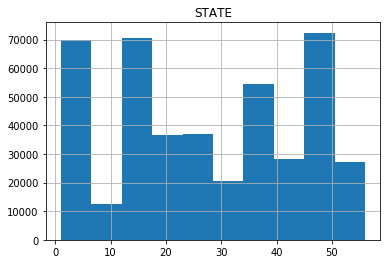

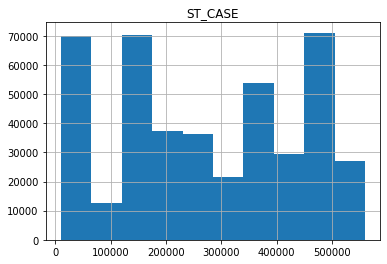

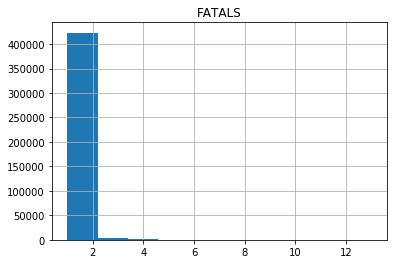

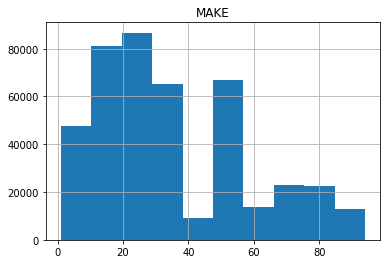

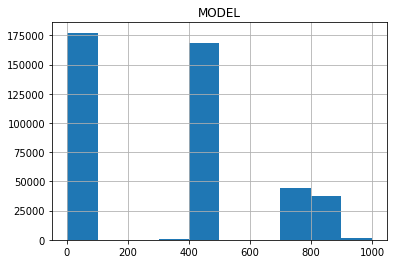

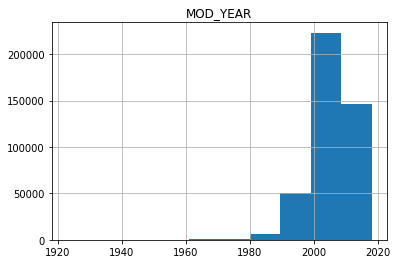

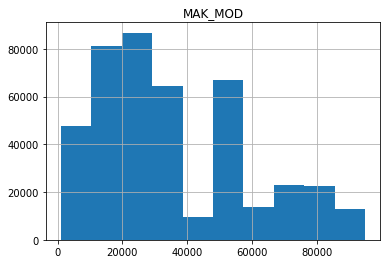

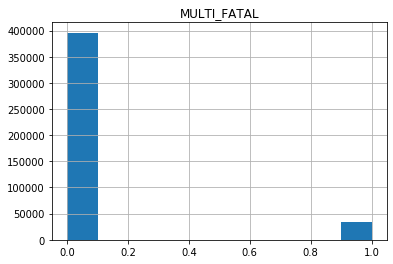

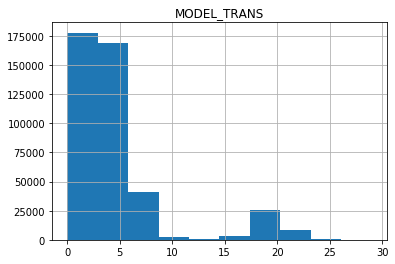

In [23]:
#Lets look at a historgram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df_merge:
    df_merge.hist(column=col)

In [24]:
df_merge.astype({'STATE':'str', 'ST_CASE':'str', 'MAKE':'str', 'MODEL':'str'}).dtypes

STATE           object
ST_CASE         object
FATALS           int64
MAKE            object
MODEL           object
MOD_YEAR         int64
MAK_MOD          int64
MULTI_FATAL      int32
MODEL_TRANS    float64
dtype: object

In [25]:
df_merge_1fatal = df_merge.loc[df_merge['MULTI_FATAL'] == False]
print(len(df_merge_1fatal))
df_merge_Nfatal = df_merge.loc[df_merge['MULTI_FATAL'] == True]
print(len(df_merge_Nfatal))

df_merge_1fatal_sample = df_merge_1fatal.sample(n=len(df_merge_Nfatal), replace=False)
print(len(df_merge_1fatal_sample))

395835
33332
33332


In [26]:
df_merge_1fatal_sample_rebrand = df_merge_1fatal_sample.copy()
df_merge_1fatal_sample_rebrand['MULTI_FATAL'] = False

df_merge_Nfatal_rebrand = df_merge_Nfatal.copy()
df_merge_Nfatal_rebrand['MULTI_FATAL'] = True

frames = [df_merge_Nfatal_rebrand, df_merge_1fatal_sample_rebrand]

df_merge_concat = pd.concat(frames).sample(frac=1)
print(df_merge_concat.head())
print(len(df_merge_concat))

        STATE  ST_CASE  FATALS  MAKE  MODEL  MOD_YEAR  MAK_MOD  MULTI_FATAL  \
169581     48   482077       3    37     32      2010    37032         True   
387193      6    60841       2    37     32      2001    37032         True   
14819      26   260202       2    12     23      2008    12023         True   
261081      8    80328       1    12    401      2016    12401        False   
443016      1    10940       2    12    422      2001    12422         True   

        MODEL_TRANS  
169581          0.0  
387193          0.0  
14819           0.0  
261081          3.0  
443016          3.0  
66664


In [10]:
## Address the 9999 unknown values

In [29]:
# - https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Try and use an SVM# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_merge_concat[['MAKE', 'MODEL_TRANS', 'MOD_YEAR']]  # Features
y=df_merge_concat['MULTI_FATAL']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

#Train the model using the training sets y_pred=clf.predict(X_test)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[4385 5555]
 [4421 5639]]
              precision    recall  f1-score   support

       False       0.50      0.44      0.47      9940
        True       0.50      0.56      0.53     10060

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy: 0.5012


In [30]:
# Attempt to export model, then reload it and use it to predict a value
#  https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(svclassifier, filename)

['finalized_model.sav']

In [32]:
# load the model from disk
loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, y_test)
# print(result)
loaded_model.predict([[12, 3, 1997]])

array([False])

In [24]:
# - https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Try and use an SVM# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_merge_concat[['MAKE', 'MODEL', 'MOD_YEAR']]  # Features
y=df_merge_concat['MULTI_FATAL']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 80% training and 20% test

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

#Train the model using the training sets y_pred=clf.predict(X_test)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[25436    13]
 [ 8541     6]]
              precision    recall  f1-score   support

       False       0.75      1.00      0.86     25449
        True       0.32      0.00      0.00      8547

    accuracy                           0.75     33996
   macro avg       0.53      0.50      0.43     33996
weighted avg       0.64      0.75      0.64     33996

Accuracy: 0.7483821626073656


In [1]:
# https://stackabuse.com/scikit-learn-save-and-restore-models/
# https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [50]:
# What happens if we don't recode make and model as strings? This is a litmus test for recoding categoricals
from sklearn.model_selection import train_test_split

X=df_merge_concat[['MAKE', 'MODEL_TRANS', 'MOD_YEAR']]  # Features
y=df_merge_concat['MULTI_FATAL']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', C=2.0)
# from sklearn.svm import LinearSVC
# svclassifier = LinearSVC()


#Train the model using the training sets y_pred=clf.predict(X_test)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[4481 5519]
 [4594 5458]]
              precision    recall  f1-score   support

       False       0.49      0.45      0.47     10000
        True       0.50      0.54      0.52     10052

    accuracy                           0.50     20052
   macro avg       0.50      0.50      0.49     20052
weighted avg       0.50      0.50      0.49     20052

Accuracy: 0.49566128067025733


In [21]:
# Attempting to use OneHotEncoder
# https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features
from sklearn.model_selection import train_test_split

X=df_merge_concat[['MAKE', 'MOD_YEAR']]  # Features
y=df_merge_concat['MULTI_FATAL']  # Labels

# Make and encode our make and model data
#   Once the data is completely translated with models we gotta do an ordinalEncoder to rebrand it
# from sklearn.preprocessing import OneHotEncoder
# makeEnc = OneHotEncoder()
# makeEnc.fit(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

#Train the model using the training sets y_pred=clf.predict(X_test)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[5038 5197]
 [5283 4880]]
              precision    recall  f1-score   support

       False       0.49      0.49      0.49     10235
        True       0.48      0.48      0.48     10163

    accuracy                           0.49     20398
   macro avg       0.49      0.49      0.49     20398
weighted avg       0.49      0.49      0.49     20398

Accuracy: 0.48622413962153155


In [34]:
make_numbers = {
    1:"American Motors",
    2:"Jeep/Kaiser-Jeep/Willys Jeep",
    3:"AM General",
    6:"Chrysler",
    7:"Dodge",
    8:"Imperial",
    9:"Plymouth",
    10:"Eagle",
    12:"Ford",
    13:"Lincoln",
    14:"Mercury",
    18:"Buick/Opel",
    19:"Cadillac",
    20:"Chevrolet",
    21:"Oldsmobile",
    22:"Pontiac",
    23:"GMC",
    24:"Saturn",
    25:"Grumman",
    26:"Coda",
    29:"Other Domestic",
    30:"Volkswagon",
    31:"Alfa Romeo",
    32:"Audi",
    33:"Austin/Austin-Healey",
    34:"BMW",
    35:"Datsun/Nissan",
    36:"Fiat",
    37:"Honda",
    38:"Isuzu",
    39:"Jaguar",
    40:"Lancia",
    41:"Mazda",
    42:"Mercedes-Benz",
    43:"MG",
    44:"Peugeot",
    45:"Porsche",
    46:"Renault",
    47:"Saab",
    48:"Subaru",
    49:"Toyota",
    50:"Triumph",
    51:"Volvo",
    52:"Mitsubishi",
    53:"Suzuki",
    54:"Acura",
    55:"Hyundai",
    56:"Merkur",
    57:"Yugo",
    58:"Infiniti",
    59:"Lexus",
    60:"Daihatsu",
    62:"Land Rover",
    63:"Kia",
    64:"Daewoo",
    65:"Smart",
    66:"Mahindra",
    67:"Scion",
    69:"Other Imports",
    70:"BSA",
    71:"Ducati",
    72:"Harley-Davidson",
    73:"Kawasaki",
    74:"Moto Guzzi",
    75:"Norton",
    76:"Yamaha",
    77:"Victory",
    78:"Other Make Moped",
    79:"Other Make Motored Cycle",
    80:"Brockway",
    81:"Diamond Reo/Reo",
    82:"Freightliner",
    83:"FWD",
    84:"International Harvester/Navistar",
    85:"Kenworth",
    86:"Mack",
    87:"Peterbilt",
    88:"Iveco/Magirus",
    89:"White/Autocar, White/GMC",
    90:"Bluebird",
    91:"Eagle Coach",
    92:"Gillig",
    93:"MCI",
    94:"Thomas Built",
    97:"Not Reported",
    98:"Other Make",
    99:"Unknown"
}

#print(sorted(df_merge["MAKE"].unique()))
make_list = []
make_dict = {}
make_list.append("<datalist>")
for make in sorted(df_merge["MAKE"].unique()):
    make_list.append('<option value ="' + str(make_numbers[make]) + '">')
    make_dict[make] = ""
make_list.append("</datalist>")
# print(make_list)
print("\n".join(make_list))
print(make_dict)

<datalist>
<option value ="American Motors">
<option value ="Jeep/Kaiser-Jeep/Willys Jeep">
<option value ="AM General">
<option value ="Chrysler">
<option value ="Dodge">
<option value ="Plymouth">
<option value ="Eagle">
<option value ="Ford">
<option value ="Lincoln">
<option value ="Mercury">
<option value ="Buick/Opel">
<option value ="Cadillac">
<option value ="Chevrolet">
<option value ="Oldsmobile">
<option value ="Pontiac">
<option value ="GMC">
<option value ="Saturn">
<option value ="Grumman">
<option value ="Other Domestic">
<option value ="Volkswagon">
<option value ="Audi">
<option value ="Austin/Austin-Healey">
<option value ="BMW">
<option value ="Datsun/Nissan">
<option value ="Fiat">
<option value ="Honda">
<option value ="Isuzu">
<option value ="Jaguar">
<option value ="Mazda">
<option value ="Mercedes-Benz">
<option value ="MG">
<option value ="Porsche">
<option value ="Saab">
<option value ="Subaru">
<option value ="Toyota">
<option value ="Triumph">
<option value 

In [57]:
#print(sorted(df_merge["MAKE"].unique()))
model_list = []
model_dict = {}
model_list.append("<datalist>")
for model in sorted(df_merge["MODEL_TRANS"].unique()):
    model_list.append('<option value ="' + str(model) + '">')
    model_dict[model] = ""
model_list.append("</datalist>")
# print(make_list)
print("\n".join(model_list))
print(model_dict)

<datalist>
<option value ="All-Terrain Vehicles">
<option value ="Automobiles">
<option value ="Buses">
<option value ="Light Trucks">
<option value ="Med/Heavy Pickup">
<option value ="Med/Heavy Trucks - CBE">
<option value ="Med/Heavy Trucks - COE">
<option value ="Med/Heavy Trucks - COE (entry position unknown)">
<option value ="Med/Heavy Trucks - COE (high entry)">
<option value ="Med/Heavy Trucks - COE (low entry)">
<option value ="Med/Heavy Trucks - Unknown engine location">
<option value ="Med/Heavy Van-Based Vehicle">
<option value ="Motorcycles">
<option value ="Other (Bus)">
<option value ="Other (Light Trucks)">
<option value ="Other (Med/Heavy Trucks)">
<option value ="Other (Vehicle)">
<option value ="Other Make (Med/Heavy Trucks)">
<option value ="Other(Autos)">
<option value ="Unknown (Autos)">
<option value ="Unknown (Bus)">
<option value ="Unknown (LT)">
<option value ="Unknown cc (ATV)Unkown (motored cycle)">
<option value ="Unknown cc (Motorcycles)">
</datalist>
{'Al

In [30]:
percentAcc = 0
percentDict = {}
for state in df_merge['STATE'].unique():
    percent = len(df_merge.loc[df_merge['STATE'] == state]) / len(df_merge) * 100
    percentAcc += percent
    percentDict[state] = percent
    print(state, " ", percent)
print(percentAcc)
print(percentDict)

percentAvg = 0

print("{")
for key in sorted(percentDict):
    print("%s: %s" % (key, percentDict[key]), ",")
    percentAvg += percentDict[key]
    percentAvg = percentAvg / 2
print("}")

print(percentAvg)

48   10.079759161352108
47   2.7949492854762834
12   8.414906085509836
13   4.301355882442033
40   1.838911193078685
53   1.5460182166848804
37   3.9460163526086585
17   2.845046333944595
28   1.8032607353314678
18   2.351066135094264
51   2.1175905882791546
26   2.8816288298028505
29   2.498328156638325
36   2.7651240659230556
10   0.34951429163938513
22   2.077745959032265
6   9.734905060267915
27   1.1023680758306207
49   0.7945624896602022
42   3.3898226098465165
1   2.477823318195481
34   1.5919210936535195
45   2.7392600083417413
8   1.7172802195881791
19   0.8849701864309232
39   3.2283470071091203
21   2.2103283803274714
25   0.8891643579305959
41   1.223300020737848
24   1.485202729939627
20   1.0501739416124725
55   1.6017074938194222
16   0.6055917626471746
30   0.46089284590846924
23   0.4194171499672622
32   0.905009005818248
9   0.7731256131063199
4   2.4156097742836704
5   1.4656299296078217
38   0.29568909072691985
35   0.8875332912362786
15   0.25258232809139564
31   0

In [24]:
stateDict = {
"1" : "AL",
"2" : "AK",
"4" : "AZ",
"5" : "AR",
"6" : "CA",
"8" : "CO",
"9" : "CT",
"10" : "DE",
"11" : "DC",
"12" : "FL",
"14" : "GA",
"15" : "HI",
"16" : "ID",
"17" : "IL",
"18" : "IN",
"19" : "IA",
"20" : "KS",
"21" : "KY",
"22" : "LA",
"23" : "ME",
"24" : "MD",
"25" : "MA",
"26" : "MI",
"27" : "MN",
"28" : "MS",
"29" : "MO",
"30" : "MT",
"31" : "NE",
"32" : "NV",
"33" : "NH",
"34" : "NJ",
"35" : "NM",
"36" : "NY",
"37" : "NC",
"38" : "ND",
"39" : "OH",
"40" : "OK",
"41" : "OR",
"42" : "PA",
"44" : "RI",
"45" : "SC",
"46" : "SD",
"47" : "TN",
"48" : "TX",
"49" : "UT",
"50" : "VT",
"51" : "VA",
"53" : "WA",
"54" : "WV",
"55" : "WI",
"56" : "WY",
}
inv_map = {v: k for k, v in stateDict.items()}
print(inv_map)

{'AL': '1', 'AK': '2', 'AZ': '4', 'AR': '5', 'CA': '6', 'CO': '8', 'CT': '9', 'DE': '10', 'DC': '11', 'FL': '12', 'GA': '14', 'HI': '15', 'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19', 'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24', 'MA': '25', 'MI': '26', 'MN': '27', 'MS': '28', 'MO': '29', 'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33', 'NJ': '34', 'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39', 'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45', 'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50', 'VA': '51', 'WA': '53', 'WV': '54', 'WI': '55', 'WY': '56'}
